<a href="https://colab.research.google.com/github/adarshp22/ANC-form_/blob/master/GoalFi_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
import json

# Read the text file
with open("ESV DATA.txt", "r") as file:
    data_str = file.read()  # Read entire content as a string

# Convert JSON string to Python dictionary
data_dict = json.loads(data_str)


In [ ]:
# Extract Stock Name
stock_name = data_dict.get("ABB", {}).get("STOCK", "Unknown")

# Extract different time intervals data
time_intervals = ["5m", "15m", "D", "H", "M"]

# Extracting percentage changes for different intervals
for tf in time_intervals:
    try:
        perc_change = data_dict["ABB"]["DATA"][0][tf]["perc_chg"]
        print(f"Percentage Change in {tf}: {perc_change}")
    except KeyError:
        print(f"{tf} data is missing")


Percentage Change in 5m: 0.02
Percentage Change in 15m: -0.24
Percentage Change in D: 1.85
Percentage Change in H: -0.24
Percentage Change in M: 8.45


In [ ]:
import numpy as np

def clean_data(value):
    return None if value == "nan" else float(value)

# Example: Handling NaN in PDSMA200 for the 15-minute interval
pdsma200_15m = clean_data(data_dict["ABB"]["DATA"][0]["15m"].get("PDSMA200", "nan"))
print(f"PDSMA200 (15m): {pdsma200_15m}")


PDSMA200 (15m): None


In [ ]:
import pandas as pd

data_list = []
for tf in time_intervals:
    tf_data = data_dict["ABB"]["DATA"][0].get(tf, {})
    tf_data["interval"] = tf  # Add time interval as a column
    data_list.append(tf_data)

df = pd.DataFrame(data_list)
print(df.head())


  perc_chg per_volume_change PDEMA20 PDEMA50 PDSMA200 PDVWAP EMA20D50  \
0     0.02             23.77    0.13    0.36      3.3   0.49     0.23   
1    -0.24             18.43    0.48    2.03      nan    NaN     1.56   
2     1.85             10.23    6.05    5.76     9.59    NaN    -0.31   
3    -0.24            -36.36    2.79     5.3      nan    NaN     2.59   
4     8.45            -55.68   19.22   35.42      nan    NaN    20.06   

  EMA20D200 EMA50D200 20DVWAP  ... VolChg PGL N50_PGL  NFO_PGL VOL_PGL  \
0      3.17      2.95    0.37  ...  23.77                                
1       nan       nan     NaN  ...  18.43              Top_10L           
2      3.76      4.06     NaN  ...  10.23                                
3       nan       NaN     NaN  ... -36.36              Top_10L           
4       nan       nan     NaN  ... -55.68              Top_10G           

  N50_VOL_PGL NFO_VOL_PGL  OiChg   OI_PGL interval  
0                          -0.16                5m  
1         

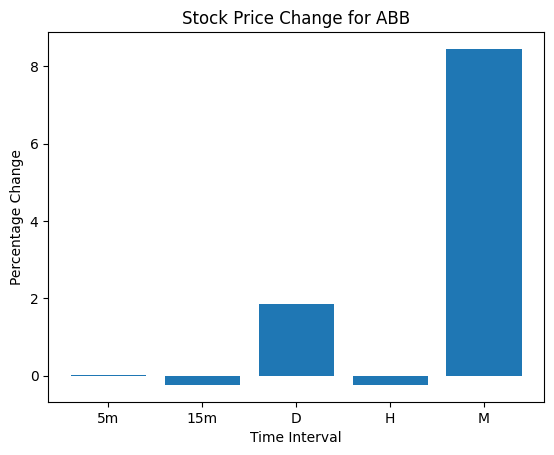

In [ ]:
import matplotlib.pyplot as plt

df_filtered = df[df["perc_chg"].notna()]  # Remove NaN values
plt.bar(df_filtered["interval"], df_filtered["perc_chg"].astype(float))
plt.xlabel("Time Interval")
plt.ylabel("Percentage Change")
plt.title(f"Stock Price Change for {stock_name}")
plt.show()


Stock: BSE
  Prev_5m_PerChange Prev_Prev_5m_PerChange Prev_5m_close perc_chg InOutEdge  \
0              0.04                   0.21         487.5    -0.16             
1               NaN                    NaN           NaN     0.08             
2               NaN                    NaN           NaN     -1.4       PDL   
3               NaN                    NaN           NaN     0.08             
4               NaN                    NaN           NaN        0       NaN   

      MP20     MP50     MP200      MCo   MCO  ... GapUp GapDown    LTP  \
0   5mPB20   5mPB50   5mPB200   5mBECO  BECO  ...   NaN     NaN    NaN   
1  15mPB20  15mPB50  15mPB200  15mBECO        ...   NaN     NaN    NaN   
2    DPB20    DPB50    DPB200    DBECO  BECO  ...   NaN     NaN    NaN   
3    HPB20    HPB50    HPB200    HBECO        ...   NaN     NaN    NaN   
4      NaN      NaN       NaN      NaN   NaN  ...  True   False  486.7   

  Day_InEdge_or_OutEdge LTP_break_15Min_High LTP_break_15Min_Low  \
0

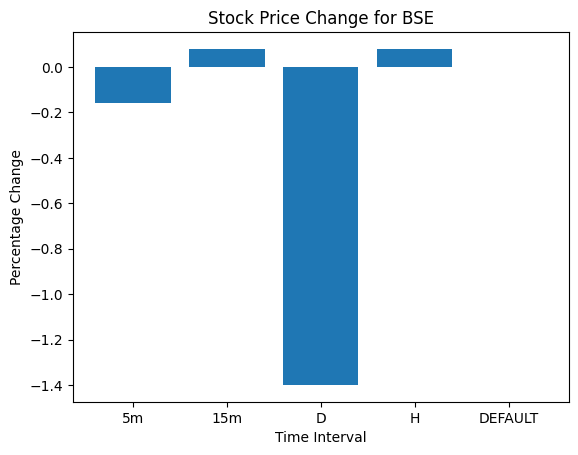

In [ ]:
# Read "HOVER DATA.txt" file
with open("HOVER DATA.txt", "r") as file:
    data_str = file.read()

# Convert JSON string to Python dictionary
data_dict = json.loads(data_str)

# Extract Stock Name dynamically
stock_name = list(data_dict.keys())[0]
stock_data = data_dict[stock_name]  # Extract stock-specific data

# Extract Time Intervals
time_intervals = ["5m", "15m", "D", "H", "DEFAULT"]

# Create a list to store structured data
data_list = []

# Loop through each time interval and extract relevant fields
for tf in time_intervals:
    tf_data = stock_data.get("DATA", [])[0].get(tf, {})
    tf_data["interval"] = tf  # Add the time interval for reference
    data_list.append(tf_data)

# Convert to Pandas DataFrame
df = pd.DataFrame(data_list)

# Handle NaN values:
df.fillna({
    "perc_chg": 0,  # Replace missing percentage change with 0
    "per_volume_change": 0,  # Replace missing volume change with 0
    "RSI": "N/A",  # Replace missing RSI values with "N/A"
    "VWAP": "N/A",  # Replace missing VWAP with "N/A"
}, inplace=True)

# Display DataFrame
print(f"Stock: {stock_name}")
print(df.head())

# Save cleaned data as CSV for further analysis
df.to_csv(f"{stock_name}_cleaned_data.csv", index=False)
print(f"Cleaned data saved as {stock_name}_cleaned_data.csv")

# Convert percentage change to float for plotting
df["perc_chg"] = pd.to_numeric(df["perc_chg"], errors="coerce").fillna(0)

# Plot percentage change over different intervals
plt.bar(df["interval"], df["perc_chg"])
plt.xlabel("Time Interval")
plt.ylabel("Percentage Change")
plt.title(f"Stock Price Change for {stock_name}")
plt.show()


In [ ]:
def determine_stock_count(investment_amount):
    """
    Determines the number of stocks to purchase based on the investment amount.

    Parameters:
        investment_amount (int or float): The total amount available for investment.

    Returns:
        int: Number of stocks to purchase.
    """
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5

# Example usage
investment_amount = float(input("Enter investment amount (₹): "))
stocks_to_purchase = determine_stock_count(investment_amount)
print(f"Number of stocks to purchase: {stocks_to_purchase}")


Enter investment amount (₹): 5565757
Number of stocks to purchase: 5


In [ ]:
def calculate_max_investment_per_stock(investment_amount):
    """
    Calculates the maximum amount of money that can be invested in each stock
    based on the number of stocks determined.

    Parameters:
        investment_amount (int or float): The total amount available for investment.

    Returns:
        float: Maximum investment per stock.
    """
    # Determine the number of stocks to purchase
    if 500 <= investment_amount <= 50000:
        num_stocks = 3
    elif 50001 <= investment_amount <= 1000000:
        num_stocks = 4
    else:
        num_stocks = 5

    # Calculate maximum investment per stock
    max_investment_per_stock = investment_amount / num_stocks
    return num_stocks, round(max_investment_per_stock, 2)

# Example usage
investment_amount = float(input("Enter investment amount (₹): "))
num_stocks, max_per_stock = calculate_max_investment_per_stock(investment_amount)
print(f"Number of stocks to purchase: {num_stocks}")
print(f"Maximum investment per stock: ₹{max_per_stock}")


Enter investment amount (₹): 55756
Number of stocks to purchase: 4
Maximum investment per stock: ₹13939.0


In [ ]:
import pandas as pd

def load_stock_data(filename):
    """Loads stock data from a CSV file and converts it into a list of dictionaries."""
    df = pd.read_csv(filename)
    return df.to_dict(orient="records")  # Convert DataFrame to list of dicts

def filter_stocks(stock_data):
    """
    Filters stocks based on predefined conditions.

    Parameters:
        stock_data (list of dict): List of stock data dictionaries.

    Returns:
        list: List of filtered stocks.
    """
    filtered_stocks = []

    for stock in stock_data:
        try:
            daily_data = eval(stock.get("D", "{}"))  # Convert string to dictionary
            weekly_data = eval(stock.get("W", "{}"))
            monthly_data = eval(stock.get("M", "{}"))
            hourly_data = eval(stock.get("H", "{}"))

            # Apply filtering conditions
            if (
                daily_data.get("MP200") == "DPA200" and
                daily_data.get("MP50") == "DPA50" and
                60 < float(daily_data.get("RSI", 0)) < 85 and
                float(monthly_data.get("RSI", 0)) > 40 and
                float(weekly_data.get("RSI", 0)) > 40 and
                hourly_data.get("MP50") == "HPA50" and
                hourly_data.get("MCo") == "HBUCO" and
                -2 < float(daily_data.get("PDEMA20", 0)) < 2
            ):
                filtered_stocks.append(stock)

        except (ValueError, SyntaxError):
            continue  # Skip stock if there's an issue with data conversion

    return filtered_stocks


def sort_stocks(filtered_stocks):
    """
    Sorts stocks based on Daily PDEMA20 and Daily RSI.

    Parameters:
        filtered_stocks (list of dict): List of filtered stock data.

    Returns:
        list: Sorted list of stocks.
    """
    return sorted(
        filtered_stocks,
        key=lambda x: (float(eval(x["D"]).get("PDEMA20", 0)), float(eval(x["D"]).get("RSI", 0))),
        reverse=True  # Higher values are better
    )


# Load stock data from the CSV
stock_data = load_stock_data(df_filtered)

# Apply filtering and sorting
filtered = filter_stocks(stock_data)
sorted_stocks = sort_stocks(filtered)

# Print sorted stocks
for stock in sorted_stocks:
    print(f"Stock: {stock['STOCK']}, PDEMA20: {eval(stock['D'])['PDEMA20']}, RSI: {eval(stock['D'])['RSI']}")


TypeError: argument of type 'method' is not iterable

In [ ]:
import json
import os
import pandas as pd

def load_stock_data(file_path):
    """Load stock data from a JSON file."""
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def determine_stock_count(investment_amount):
    """Determine the number of stocks to purchase based on investment amount."""
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5

def calculate_max_investment_per_stock(investment_amount, stock_count):
    """Calculate the max amount to invest per stock."""
    return investment_amount / stock_count

def filter_stocks(stock_data):
    """Filter stocks based on given conditions."""
    filtered_stocks = []

    for stock in stock_data:
        daily_data = stock.get("D", {})
        hourly_data = stock.get("H", {})
        monthly_data = stock.get("M", {})
        weekly_data = stock.get("W", {})

        if (daily_data.get("MP200") == "DPA200" and
            daily_data.get("MP50") == "DPA50" and
            60 < float(daily_data.get("RSI", 0)) < 85 and
            float(monthly_data.get("RSI", 0)) > 40 and
            float(weekly_data.get("RSI", 0)) > 40 and
            hourly_data.get("MP50") == "HPA50" and
            hourly_data.get("MCo") == "HBUCO" and
            -2 < float(daily_data.get("PDEMA20", 0)) < 2):
            filtered_stocks.append(stock)

    return filtered_stocks

def sort_stocks(filtered_stocks):
    """Sort stocks based on Daily PDEMA20 and Daily RSI."""
    return sorted(filtered_stocks, key=lambda stock: (float(stock["D"].get("PDEMA20", 0)), float(stock["D"].get("RSI", 0))), reverse=True)

def select_top_stocks(sorted_stocks, num_stocks):
    """Select top N stocks from the sorted list."""
    return sorted_stocks[:num_stocks]

# Example execution
if __name__ == "__main__":
    investment_amount = 75000  # Example investment amount
    stock_count = determine_stock_count(investment_amount)
    max_per_stock = calculate_max_investment_per_stock(investment_amount, stock_count)

    # Assume files are stored in a folder named 'stock_data'
    stock_files = ["HOVER DATA.txt", "ESV DATA.txt"]
    all_stock_data = []

    for file in stock_files:
        file_path = os.path.join("stock_data", file)
        all_stock_data.extend(load_stock_data(file)["DATA"])

    filtered_stocks = filter_stocks(all_stock_data)
    sorted_stocks = sort_stocks(filtered_stocks)
    top_stocks = select_top_stocks(sorted_stocks, stock_count)

    print("Top Selected Stocks:")
    for stock in top_stocks:
        print(stock["STOCK"], stock["D"]["PDEMA20"], stock["D"]["RSI"])

KeyError: 'DATA'

In [ ]:
import pandas as pd
## Again start

In [ ]:
import json
import csv


def json_to_csv(json_filename, csv_filename):
    # Step 1: Load JSON file
    with open(json_filename, "r", encoding="utf-8") as file:
        data = json.load(file)

    # Step 2: Flatten and extract data
    stock_data = []
    fieldnames = set()  # To store all unique column names

    for stock_name, stock_info in data.items():
        for entry in stock_info.get("DATA", []):  # Iterate over the "DATA" list
            stock_row = {"STOCK": entry["STOCK"]}

            # Extract relevant time-frame data
            for timeframe in ["5m", "15m", "D", "H", "DEFAULT"]:
                if timeframe in entry:
                    for key, value in entry[timeframe].items():
                        column_name = f"{timeframe}_{key}"
                        stock_row[column_name] = value
                        fieldnames.add(column_name)  # Add to fieldnames set

            stock_data.append(stock_row)

    # Step 3: Write to CSV file with dynamically determined fieldnames
    fieldnames = ["STOCK"] + sorted(fieldnames)  # Ensure STOCK is the first column
    with open(csv_filename, "w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for row in stock_data:
            writer.writerow(row)  # Ensure missing fields get default empty values

    print(f"CSV file '{csv_filename}' created successfully!")

# Convert both JSON files to CSV
json_to_csv("HOVER DATA.txt", "hover_data.csv")
json_to_csv("ESV DATA.txt", "esv_data.csv")


CSV file 'hover_data.csv' created successfully!
CSV file 'esv_data.csv' created successfully!


In [ ]:
df_hover=pd.read_csv('/content/hover_data.csv')
df_hover.head()

,STOCK,15m_BELCO,15m_BELPVT,15m_BLPVT,15m_BULCO,15m_InOutEdge,15m_MACD,15m_MCO,15m_MCo,15m_MP20,...,H_RSI,H_RSI C,H_RSI DC,H_RSI KC,H_RSI KCD,H_RSI KD,H_open_equals_high,H_open_equals_low,H_per_volume_change,H_perc_chg
0,BSE,NaN,NaN,NaN,NaN,NaN,BLW BUCO,NaN,15mBECO,15mPB20,...,26.71,B40,NaN,B20,NaN,KBD,False,False,-23.81,0.08
1,BSE,NaN,NaN,NaN,NaN,NaN,ABV BUCO,NaN,15mBUCO,15mPA20,...,67.39,A60,A80,A80,NaN,KAD,False,False,-77.86,0.00
2,BSE,NaN,NaN,NaN,NaN,NaN,ABV BECO,NaN,15mBUCO,15mPB20,...,56.07,NaN,NaN,NaN,NaN,KBD,False,False,-28.63,-0.10
3,BSE,NaN,NaN,NaN,NaN,P15mL,BLW BUCO,NaN,15mBECO,15mPB20,...,41.20,NaN,B20,B20,NaN,KBD,False,False,-1.89,-0.11
4,BSE,BELCO,NaN,NaN,NaN,P15mL,BLW BUCO,NaN,15mBECO,15mPB20,...,34.41,B40,B20,B20,NaN,KBD,True,False,-0.81,-0.09


In [ ]:
df_esv=pd.read_csv('/content/esv_data.csv')
df_esv.head()

<ipython-input-5-67ca9449b6ba>:1: DtypeWarning: Columns (9,40,69,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_esv=pd.read_csv('/content/esv_data.csv')


,STOCK,15m_DECLINING_LTP,15m_DECLINING_OI,15m_DECLINING_RSI,15m_DECLINING_VOLUME,15m_EMA20D200,15m_EMA20D50,15m_EMA50D200,15m_LtpChg,15m_N50_OI_PGL,...,H_PDSMA200,H_PGL,H_RISING_LTP,H_RISING_OI,H_RISING_RSI,H_RISING_VOLUME,H_VOL_PGL,H_VolChg,H_per_volume_change,H_perc_chg
0,ABB,False,True,False,False,NaN,1.56,NaN,-0.24,NaN,...,NaN,,False,False,False,False,,-36.36,-36.36,-0.24
1,ABB,False,False,False,False,NaN,1.18,NaN,0.10,NaN,...,NaN,,False,False,False,False,,-54.51,-54.51,0.10
2,ABB,False,False,False,False,NaN,0.69,NaN,-0.02,NaN,...,NaN,,False,True,False,False,,-15.41,-15.41,-0.02
3,ABB,False,False,False,False,NaN,-0.48,NaN,0.29,NaN,...,NaN,,True,False,True,False,,-73.78,-73.78,0.29
4,ABB,False,False,False,False,NaN,-0.50,NaN,0.01,NaN,...,NaN,,False,False,False,False,,-45.66,-45.66,0.01


In [ ]:
def determine_stock_count(investment_amount):
    """
    Determines the number of stocks to purchase based on the investment amount.
    """
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5

# # Example usage
# investment_amount = 75000  # Change this value as needed
# num_stocks = determine_stock_count(investment_amount)
# print(f"Investment Amount: ₹{investment_amount}, Stocks to Purchase: {num_stocks}")


In [ ]:
hover_stocks = set(df_hover['STOCK'])
esv_stocks = set(df_esv['STOCK'])

In [ ]:
common_stocks = list(hover_stocks.intersection(esv_stocks))
common_stocks

['IDEA',
 'BHARTIARTL',
 'CUMMINSIND',
 'TV18BRDCST',
 'GESHIP',
 'KOTAKBANK',
 'PRSMJOHNSN',
 'NIFTY REALTY',
 'CROMPTON',
 'BAJFINANCE',
 'POLYMED',
 'AARTIDRUGS',
 'IEX',
 'CAMPUS',
 'PAGEIND',
 'VGUARD',
 'CCL',
 'APOLLOHOSP',
 'MOTHERSON',
 'SUMICHEM',
 'MPHASIS',
 'SHOPERSTOP',
 'MCX',
 'EASEMYTRIP',
 'ANGELONE',
 'LT',
 'NETWORK18',
 'NIFTY HEALTHCARE',
 'MUTHOOTFIN',
 'AWL',
 'DEVYANI',
 'NLCINDIA',
 'LALPATHLAB',
 'CREDITACC',
 'POWERINDIA',
 'DMART',
 'LINDEINDIA',
 'HINDCOPPER',
 'FORTIS',
 'LICHSGFIN',
 'KPITTECH',
 'GRINFRA',
 'VBL',
 'DATAPATTNS',
 'ESCORTS',
 'BPCL',
 'BANKBARODA',
 'LUXIND',
 'MHRIL',
 'TCI',
 'IRFC',
 'DRREDDY',
 'PFC',
 'RELAXO',
 'NMDC',
 'JSL',
 'CEATLTD',
 'TRENT',
 'CSBBANK',
 'PFIZER',
 'JUBLPHARMA',
 'BEL',
 'GAEL',
 'TATAPOWER',
 'KFINTECH',
 'SOBHA',
 'CRISIL',
 'RADICO',
 'BALKRISIND',
 'NBCC',
 'TITAN',
 'UFLEX',
 'FINCABLES',
 'GODREJIND',
 'GRANULES',
 'PIIND',
 'MOTILALOFS',
 'ADANIPOWER',
 'GODREJAGRO',
 'SWSOLAR',
 'INDIGOPNTS',
 'ICICI

In [ ]:
def calculate_investment_cap(investment_amount):
    num_stocks = determine_stock_count(investment_amount)
    max_per_stock = investment_amount / num_stocks  # Distribute investment equally
    return num_stocks, max_per_stock

In [ ]:
investment_amount = 75000  # Example investment amount
num_stocks, max_per_stock = calculate_investment_cap(investment_amount)

print(f"Investment Amount: ₹{investment_amount}")
print(f"Number of Stocks to Invest In: {num_stocks}")
print(f"Max Investment per Stock: ₹{max_per_stock:.2f}")

Investment Amount: ₹75000
Number of Stocks to Invest In: 4
Max Investment per Stock: ₹18750.00


In [ ]:
for col in df_hover.columns:
    print(col)

STOCK
15m_BELCO
15m_BELPVT
15m_BLPVT
15m_BULCO
15m_InOutEdge
15m_MACD
15m_MCO
15m_MCo
15m_MP20
15m_MP200
15m_MP50
15m_Prev_15m_PerChange
15m_Prev_15m_close
15m_Prev_Prev_15m_PerChange
15m_RSI
15m_RSI C
15m_RSI DC
15m_RSI KC
15m_RSI KCD
15m_RSI KD
15m_open_equals_high
15m_open_equals_low
15m_per_volume_change
15m_perc_chg
5m_BELCO
5m_BELPVT
5m_BLPVT
5m_BULCO
5m_InOutEdge
5m_MACD
5m_MCO
5m_MCo
5m_MP20
5m_MP200
5m_MP50
5m_Prev_5m_PerChange
5m_Prev_5m_close
5m_Prev_Prev_5m_PerChange
5m_RSI
5m_RSI C
5m_RSI DC
5m_RSI KC
5m_RSI KCD
5m_RSI KD
5m_open_equals_high
5m_open_equals_low
5m_per_volume_change
5m_perc_chg
DEFAULT_Day_InEdge_or_OutEdge
DEFAULT_DaybeforeYesterdayPerChange
DEFAULT_GapDown
DEFAULT_GapUp
DEFAULT_LTP
DEFAULT_LTP_break_15Min_High
DEFAULT_LTP_break_15Min_Low
DEFAULT_LTP_break_1Hr_High
DEFAULT_LTP_break_1Hr_Low
DEFAULT_LotSize
DEFAULT_Prev_month_close
DEFAULT_Prev_week_close
DEFAULT_VWAP
DEFAULT_VWAP_DIRECTION
DEFAULT_YesterdayPerChange
DEFAULT_Yesterday_close
DEFAULT_open_equa

In [ ]:
for col in df_esv.columns:
    print(col)

STOCK
15m_DECLINING_LTP
15m_DECLINING_OI
15m_DECLINING_RSI
15m_DECLINING_VOLUME
15m_EMA20D200
15m_EMA20D50
15m_EMA50D200
15m_LtpChg
15m_N50_OI_PGL
15m_N50_PGL
15m_N50_VOL_PGL
15m_NFO_PGL
15m_NFO_VOL_PGL
15m_OI_PGL
15m_OiChg
15m_PDEMA20
15m_PDEMA50
15m_PDSMA200
15m_PGL
15m_RISING_LTP
15m_RISING_OI
15m_RISING_RSI
15m_RISING_VOLUME
15m_VOL_PGL
15m_VolChg
15m_per_volume_change
15m_perc_chg
5m_200DVWAP
5m_20DVWAP
5m_50DVWAP
5m_DECLINING_LTP
5m_DECLINING_OI
5m_DECLINING_RSI
5m_DECLINING_VOLUME
5m_DECLINING_VWAP
5m_EMA20D200
5m_EMA20D50
5m_EMA50D200
5m_LtpChg
5m_N50_OI_PGL
5m_N50_PGL
5m_N50_VOL_PGL
5m_NFO_PGL
5m_NFO_VOL_PGL
5m_OI_PGL
5m_OiChg
5m_PDEMA20
5m_PDEMA50
5m_PDSMA200
5m_PDVWAP
5m_PGL
5m_RISING_LTP
5m_RISING_OI
5m_RISING_RSI
5m_RISING_VOLUME
5m_RISING_VWAP
5m_VOL_PGL
5m_VolChg
5m_per_volume_change
5m_perc_chg
D_DECLINING_LTP
D_DECLINING_OI
D_DECLINING_RSI
D_DECLINING_VOLUME
D_EMA20D200
D_EMA20D50
D_EMA50D200
D_LtpChg
D_N50_OI_PGL
D_N50_PGL
D_N50_VOL_PGL
D_NFO_PGL
D_NFO_VOL_PGL
D_OI_PG

In [ ]:
import pandas as pd


# Convert necessary columns to numeric (ignore errors for non-convertible values)
cols_to_convert_hover = ["D_RSI", "D_M_RSI", "H_M_RSI"]  # Hover dataset
cols_to_convert_esv = ["D_PDEMA20"]  # ESV dataset

for col in cols_to_convert_hover:
    df_hover[col] = pd.to_numeric(df_hover[col], errors="coerce")  # Convert to numeric

for col in cols_to_convert_esv:
    df_esv[col] = pd.to_numeric(df_esv[col], errors="coerce")  # Convert to numeric

#  Filtering on HOVER dataset
filtered_hover = df_hover[
    (df_hover["D_MP200"] == "DPA200") &  # Daily Moving Price 200
    (df_hover["D_MP50"] == "DPA50") &    # Daily Moving Price 50
    (df_hover["H_MP50"] == "HPA50") &    # Hourly Moving Price 50
    (df_hover["H_MCo"] == "HBUCO") &     # Hourly MCo
    (df_hover["D_RSI"] > 60) & (df_hover["D_RSI"] < 85) &  # Daily RSI condition
    (df_hover["D_M_RSI"] > 40) &         # Monthly RSI
    (df_hover["H_M_RSI"] > 40)           # Weekly RSI
]

#  Filtering on ESV dataset
filtered_esv = df_esv[
    (df_esv["D_PDEMA20"] > -2) & (df_esv["D_PDEMA20"] < 2)  # Daily PDEMA20 condition
]

# ✅ Print results
print("\nFiltered Hover Data:")
print(filtered_hover[["STOCK"]])  # Display only stock names

print("\nFiltered ESV Data:")
print(filtered_esv[["STOCK"]])  # Display only stock names



Filtered Hover Data:
Empty DataFrame
Columns: [STOCK]
Index: []

Filtered ESV Data:
                   STOCK
14                   ABB
15                   ABB
17                   ABB
19                   ABB
20                   ABB
...                  ...
67723  NIFTY OIL AND GAS
67724  NIFTY OIL AND GAS
67725  NIFTY OIL AND GAS
67726  NIFTY OIL AND GAS
67727  NIFTY OIL AND GAS

[27943 rows x 1 columns]


In [ ]:
import pandas as pd

# Load datasets
df_esv = pd.read_csv('/content/esv_data.csv')
df_hover = pd.read_csv('/content/hover_data.csv')

# Ensure columns exist before filtering
esv_required_columns = ["D_PDEMA20"]
hover_required_columns = ["D_RSI", "D_M_RSI", "H_M_RSI", "D_MP200", "D_MP50", "H_MP50", "H_MCo"]

# Convert necessary columns to numeric
for col in esv_required_columns:
    if col in df_esv.columns:
        df_esv[col] = pd.to_numeric(df_esv[col], errors="coerce")

for col in hover_required_columns:
    if col in df_hover.columns:
        df_hover[col] = pd.to_numeric(df_hover[col], errors="coerce")

# ✅ Filtering on df_esv dataset
filtered_esv = df_esv[
    (df_esv["D_PDEMA20"] > -2) & (df_esv["D_PDEMA20"] < 2)  # Daily PDEMA20 condition
] if "D_PDEMA20" in df_esv.columns else pd.DataFrame()

# ✅ Filtering on df_hover dataset
filtered_hover = df_hover[
    (df_hover["D_MP200"] == "DPA200") &  # Daily MP200
    (df_hover["D_MP50"] == "DPA50") &    # Daily MP50
    (df_hover["D_RSI"] > 60) & (df_hover["D_RSI"] < 85) &  # Daily RSI condition
    (df_hover["D_M_RSI"] > 40) &         # Monthly RSI
    (df_hover["H_M_RSI"] > 40) &         # Weekly RSI
    (df_hover["H_MP50"] == "HPA50") &    # Hourly MP50
    (df_hover["H_MCo"] == "HBUCO")       # Hourly MCo
] if all(col in df_hover.columns for col in hover_required_columns) else pd.DataFrame()

# ✅ Print results
print("\nFiltered ESV Data:")
print(filtered_esv[["STOCK", "D_PDEMA20"]] if not filtered_esv.empty else "No matching stocks found in ESV.")

print("\nFiltered Hover Data:")
print(filtered_hover[["STOCK", "D_MP200", "D_MP50", "D_RSI", "D_M_RSI", "H_M_RSI", "H_MP50", "H_MCo"]] if not filtered_hover.empty else "No matching stocks found in Hover.")


<ipython-input-14-97f418a4abae>:4: DtypeWarning: Columns (9,40,69,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_esv = pd.read_csv('/content/esv_data.csv')



Filtered ESV Data:
                   STOCK  D_PDEMA20
14                   ABB       1.74
15                   ABB       1.20
17                   ABB       0.99
19                   ABB       1.66
20                   ABB       0.91
...                  ...        ...
67723  NIFTY OIL AND GAS      -1.27
67724  NIFTY OIL AND GAS      -1.45
67725  NIFTY OIL AND GAS      -1.42
67726  NIFTY OIL AND GAS      -1.12
67727  NIFTY OIL AND GAS      -1.33

[27943 rows x 2 columns]

Filtered Hover Data:
No matching stocks found in Hover.


In [ ]:
filtered_esv.columns

Index(['STOCK', '15m_DECLINING_LTP', '15m_DECLINING_OI', '15m_DECLINING_RSI',
       '15m_DECLINING_VOLUME', '15m_EMA20D200', '15m_EMA20D50',
       '15m_EMA50D200', '15m_LtpChg', '15m_N50_OI_PGL',
       ...
       'H_PDSMA200', 'H_PGL', 'H_RISING_LTP', 'H_RISING_OI', 'H_RISING_RSI',
       'H_RISING_VOLUME', 'H_VOL_PGL', 'H_VolChg', 'H_per_volume_change',
       'H_perc_chg'],
      dtype='object', length=114)

In [ ]:
# Filtering and sorting df_esv
filtered_esv = df_esv[
    (df_esv["D_PDEMA20"] > -2) & (df_esv["D_PDEMA20"] < 2)
]
filtered_esv_again=filtered_esv.sort_values(by=["D_PDEMA20"], ascending=[True])
# Filtering and sorting df_hover
filtered_hover = df_hover[

    (df_hover["D_RSI"] > 60) & (df_hover["D_RSI"] < 85)
]
filtered_hover_again=filtered_hover.sort_values(by=["D_RSI"], ascending=[True])
# Display the results
print("Filtered and Sorted ESV Data:\n", filtered_esv_again)
print("Filtered and Sorted Hover Data:\n", filtered_hover_again)


Filtered and Sorted ESV Data:
               STOCK 15m_DECLINING_LTP 15m_DECLINING_OI 15m_DECLINING_RSI  \
22727          GAEL              True              NaN              True   
63994    NIFTY BANK             False              NaN             False   
33124      JUSTDIAL             False              NaN             False   
43964           PVR             False            False             False   
47721        RALLIS             False              NaN             False   
...             ...               ...              ...               ...   
7877            BDL             False              NaN             False   
26436        HONAUT             False              NaN             False   
56470     TATAPOWER             False             True             False   
65206  NIFTY REALTY             False              NaN             False   
45969    PRSMJOHNSN             False              NaN             False   

      15m_DECLINING_VOLUME  15m_EMA20D200  15m_EMA20D50 

In [ ]:
filtered_esv.head()


,STOCK,15m_DECLINING_LTP,15m_DECLINING_OI,15m_DECLINING_RSI,15m_DECLINING_VOLUME,15m_EMA20D200,15m_EMA20D50,15m_EMA50D200,15m_LtpChg,15m_N50_OI_PGL,...,H_PDSMA200,H_PGL,H_RISING_LTP,H_RISING_OI,H_RISING_RSI,H_RISING_VOLUME,H_VOL_PGL,H_VolChg,H_per_volume_change,H_perc_chg
22727,GAEL,True,NaN,True,False,NaN,0.26,NaN,-0.13,NaN,...,NaN,,False,NaN,False,False,,-65.77,-65.77,-0.13
63994,NIFTY BANK,False,NaN,False,False,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,True,NaN,True,False,NaN,NaN,-66.67,0.01
33124,JUSTDIAL,False,NaN,False,False,NaN,-0.47,NaN,-0.04,NaN,...,NaN,,False,NaN,False,False,,-36.92,-36.92,-0.04
43964,PVR,False,False,False,False,NaN,0.63,NaN,-0.04,NaN,...,NaN,,False,False,False,False,,-67.99,-67.99,-0.04
47721,RALLIS,False,NaN,False,False,NaN,-0.64,NaN,-0.43,NaN,...,NaN,,False,NaN,False,False,,-21.68,-21.68,-0.43


In [ ]:
filtered_hover.head()

,STOCK,15m_BELCO,15m_BELPVT,15m_BLPVT,15m_BULCO,15m_InOutEdge,15m_MACD,15m_MCO,15m_MCo,15m_MP20,...,H_RSI,H_RSI C,H_RSI DC,H_RSI KC,H_RSI KCD,H_RSI KD,H_open_equals_high,H_open_equals_low,H_per_volume_change,H_perc_chg
24808,LTIM,NaN,NaN,NaN,NaN,NaN,ABV BUCO,NaN,15mBUCO,15mPA20,...,59.67,NaN,A80,A80,KCBD80,KBD,False,False,-59.68,-0.14
23819,KANSAINER,NaN,NaN,NaN,NaN,P15mH,BLW BECO,NaN,15mBUCO,15mPB20,...,60.24,A60,B20,B20,NaN,KBD,False,False,36.28,0.11
45523,TTML,BELCO,NaN,NaN,NaN,NaN,BLW BECO,NaN,15mBECO,15mPB20,...,46.22,NaN,B20,B20,NaN,KBD,False,False,-15.65,0.00
27411,MAHLIFE,NaN,NaN,NaN,NaN,NaN,ABV BECO,NaN,15mBECO,15mPB20,...,48.08,NaN,NaN,NaN,NaN,KBD,False,False,-31.27,-0.06
59152,BEML,NaN,NaN,NaN,NaN,NaN,BLW BUCO,NaN,15mBECO,15mPA20,...,30.09,B40,B20,B20,NaN,KAD,False,False,88.54,0.46


In [ ]:
import pandas as pd

def portfolio_churn(df, min_stocks=5, top_n=10, interval=30):
    if "DEFAULT_Yesterday_close" not in df.columns:
        if "DEFAULT_LTP" in df.columns:
            df["DEFAULT_Yesterday_close"] = df["DEFAULT_LTP"]
        else:
            print("Skipping: No valid column for closing price.")
            return pd.DataFrame()  # Return an empty DataFrame

    if "DEFAULT_Prev_week_close" not in df.columns:
        print("Skipping: 'DEFAULT_Prev_week_close' not found.")
        return pd.DataFrame()  # Return an empty DataFrame

    monthly_churned_stocks = []

    for i in range(0, len(df), interval):
        month_df = df.iloc[i:i+interval]

        if len(month_df) < min_stocks:
            print(f"Skipping batch {i//interval + 1} - Insufficient stocks ({len(month_df)})")
            continue

        # Calculate P&L
        month_df['P&L'] = ((month_df['DEFAULT_Yesterday_close'] - month_df['DEFAULT_Prev_week_close']) /
                           month_df['DEFAULT_Prev_week_close']) * 100

        sorted_stocks = month_df.sort_values(by=['P&L'], ascending=False)
        selected_stocks = sorted_stocks.head(top_n)

        monthly_churned_stocks.append(selected_stocks)

    return pd.concat(monthly_churned_stocks, ignore_index=True) if monthly_churned_stocks else pd.DataFrame()

# Run for both datasets
churned_esv = portfolio_churn(df_esv)
churned_hover = portfolio_churn(df_hover)

print("\nFinal Churned Portfolio for ESV:\n", churned_esv)
print("\nFinal Churned Portfolio for Hover:\n", churned_hover)


Skipping: No valid column for closing price.


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['P&L'] = ((month_df['DEFAULT_Yesterday_close'] - month_df['DEFAULT_Prev_week_close']) /
<ipython-input-28-80e04ff392de>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['P&L'] = ((month_df['DEFAULT_Yesterday_close'] - month_df['DEFAULT_Prev_week_close']) /
<ipython-input-28-80e04ff392de>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


Final Churned Portfolio for ESV:
 Empty DataFrame
Columns: []
Index: []

Final Churned Portfolio for Hover:
         STOCK 15m_BELCO 15m_BELPVT 15m_BLPVT 15m_BULCO 15m_InOutEdge  \
0         BSE       NaN        NaN       NaN       NaN           NaN   
1         BSE       NaN        NaN       NaN       NaN           NaN   
2         BSE       NaN        NaN       NaN       NaN         P15mL   
3         BSE       NaN        NaN       NaN       NaN          I15m   
4         BSE       NaN        NaN       NaN       NaN           NaN   
...       ...       ...        ...       ...       ...           ...   
21433  360ONE       NaN        NaN       NaN       NaN           NaN   
21434  360ONE       NaN        NaN       NaN       NaN           NaN   
21435  360ONE       NaN        NaN       NaN       NaN           NaN   
21436  360ONE       NaN        NaN       NaN       NaN           NaN   
21437  360ONE       NaN        NaN       NaN       NaN           NaN   

       15m_MACD  15m_MCO 

In [ ]:
import json
import pandas as pd
from collections import defaultdict

def exhaustive_json_conversion(file_path):
    """Extract all potential columns from deeply nested stock JSON data"""

    with open(file_path, 'r') as f:
        raw_data = json.load(f)

    column_registry = defaultdict(set)
    records = []

    # First pass: Discover all possible columns
    for stock_symbol, stock_data in raw_data.items():
        for record in stock_data.get('DATA', []):
            for time_interval, metrics in record.items():
                if time_interval in ['_id', 'STOCK']:
                    continue
                for metric in metrics.keys():
                    column_registry[time_interval].add(metric)

    # Create column template
    column_template = {'STOCK': None, '_record_oid': None}
    for interval, metrics in column_registry.items():
        column_template.update({f"{interval}_{m}": None for m in metrics})

    # Second pass: Populate data
    for stock_symbol, stock_data in raw_data.items():
        base_symbol = stock_data.get('STOCK', stock_symbol)

        for record in stock_data.get('DATA', []):
            new_entry = column_template.copy()
            new_entry['STOCK'] = base_symbol
            new_entry['_record_oid'] = record.get('_id', {}).get('$oid', None)

            for interval, metrics in record.items():
                if interval in ['_id', 'STOCK']:
                    continue

                for metric, value in metrics.items():
                    col_name = f"{interval}_{metric}"
                    new_entry[col_name] = value

            records.append(new_entry)

    return pd.DataFrame(records)

# Usage for ESV dataset
esv_df = exhaustive_json_conversion('/content/ESV DATA.txt')

# Full column extraction verification
print(f"Total columns extracted: {len(esv_df.columns)}")
print("Column samples:", esv_df.columns[:15])


Total columns extracted: 170
Column samples: Index(['STOCK', '_record_oid', '5m_EMA20D200', '5m_RISING_LTP',
       '5m_N50_OI_PGL', '5m_DECLINING_LTP', '5m_20DVWAP', '5m_NFO_VOL_PGL',
       '5m_RISING_VOLUME', '5m_RISING_OI', '5m_perc_chg', '5m_PDEMA20',
       '5m_DECLINING_VWAP', '5m_PGL', '5m_RISING_VWAP'],
      dtype='object')


In [ ]:
esv_df.head()

,STOCK,_record_oid,5m_LtpChg,5m_N50_PGL,5m_20DVWAP,5m_EMA20D200,5m_OI_PGL,5m_PGL,5m_RISING_OI,5m_VOL_PGL,...,W_EMA50D200,W_per_volume_change,W_RISING_VOLUME,W_PDEMA20,W_RISING_RSI,W_DECLINING_LTP,W_VolChg,W_DECLINING_OI,W_N50_OI_PGL,DateTime_$date
0,ABB,63ce5220c928edf59bf5578e,0.02,,0.37,3.17,,,False,,...,35.77,-33.46,False,5.56,True,False,-33.46,False,None,2023-02-08T15:34:31.453Z
1,ABB,63ce5220c928edf59bf5578e,-0.04,,0.38,1.99,,,False,,...,35.8,-15.52,False,6.88,True,False,-15.52,False,None,2023-02-09T15:34:35.165Z
2,ABB,63ce5220c928edf59bf5578e,-0.04,,0.32,1.32,Top_20G,,True,Top_20G,...,35.83,4.96,True,7.89,True,False,4.96,False,None,2023-02-10T15:33:31.494Z
3,ABB,63ce5220c928edf59bf5578e,0.14,,-1.37,-1.45,Top_10L,,False,,...,35.87,-18.47,False,4.79,False,False,-18.47,False,None,2023-02-13T15:34:29.071Z
4,ABB,63ce5220c928edf59bf5578e,-0.19,,-0.98,-0.97,Top_10G,,False,,...,35.87,21.4,True,4.73,False,False,21.40,False,None,2023-02-14T15:34:04.092Z


In [ ]:
esv_df.to_csv('file2.csv', header=True, index=True)

In [ ]:
import json
import pandas as pd
from collections import defaultdict

def exhaustive_json_conversion(file_path):
    """Extract all potential columns from deeply nested stock JSON data"""

    with open(file_path, 'r') as f:
        raw_data = json.load(f)

    column_registry = defaultdict(set)
    records = []

    # First pass: Discover all possible columns
    for stock_symbol, stock_data in raw_data.items():
        for record in stock_data.get('DATA', []):
            for time_interval, metrics in record.items():
                if time_interval in ['_id', 'STOCK']:
                    continue
                for metric in metrics.keys():
                    column_registry[time_interval].add(metric)

    # Create column template
    column_template = {'STOCK': None, '_record_oid': None}
    for interval, metrics in column_registry.items():
        column_template.update({f"{interval}_{m}": None for m in metrics})

    # Second pass: Populate data
    for stock_symbol, stock_data in raw_data.items():
        base_symbol = stock_data.get('STOCK', stock_symbol)

        for record in stock_data.get('DATA', []):
            new_entry = column_template.copy()
            new_entry['STOCK'] = base_symbol
            new_entry['_record_oid'] = record.get('_id', {}).get('$oid', None)

            for interval, metrics in record.items():
                if interval in ['_id', 'STOCK']:
                    continue

                for metric, value in metrics.items():
                    col_name = f"{interval}_{metric}"
                    new_entry[col_name] = value

            records.append(new_entry)

    return pd.DataFrame(records)

# Usage for ESV dataset
hover_df = exhaustive_json_conversion('/content/HOVER DATA.txt')

# Full column extraction verification
print(f"Total columns extracted: {len(hover_df.columns)}")
print("Column samples:", hover_df.columns[:15])


Total columns extracted: 167
Column samples: Index(['STOCK', '_record_oid', '5m_MP200', '5m_BULCO', '5m_RSI C',
       '5m_perc_chg', '5m_InOutEdge', '5m_BELCO', '5m_MP20',
       '5m_Prev_5m_close', '5m_RSI KC', '5m_RSI', '5m_MACD',
       '5m_per_volume_change', '5m_MP50'],
      dtype='object')


In [ ]:
hover_df.to_csv('hover.csv', header=True, index=True)

In [ ]:
import json
import pandas as pd
from collections import defaultdict

def exhaustive_json_conversion(file_path):
    """Extract all potential columns from deeply nested stock JSON data"""

    with open(file_path, 'r') as f:
        raw_data = json.load(f)

    column_registry = defaultdict(set)
    records = []

    # First pass: Discover all possible columns
    for stock_symbol, stock_data in raw_data.items():
        for record in stock_data.get('DATA', []):
            for time_interval, metrics in record.items():
                if time_interval in ['_id', 'STOCK']:
                    continue
                for metric in metrics.keys():
                    column_registry[time_interval].add(metric)

    # Create column template
    column_template = {'STOCK': None, '_record_oid': None}
    for interval, metrics in column_registry.items():
        column_template.update({f"{interval}_{m}": None for m in metrics})

    # Second pass: Populate data
    for stock_symbol, stock_data in raw_data.items():
        base_symbol = stock_data.get('STOCK', stock_symbol)

        for record in stock_data.get('DATA', []):
            new_entry = column_template.copy()
            new_entry['STOCK'] = base_symbol
            new_entry['_record_oid'] = record.get('_id', {}).get('$oid', None)

            for interval, metrics in record.items():
                if interval in ['_id', 'STOCK']:
                    continue

                for metric, value in metrics.items():
                    col_name = f"{interval}_{metric}"
                    new_entry[col_name] = value

            records.append(new_entry)

    return pd.DataFrame(records)

# Ensure the file path is correct
hover_file_path = '/content/HOVER DATA.txt'  # Update this path

# Execute the conversion
hover_df = exhaustive_json_conversion(hover_file_path)

# Display the first few rows of the converted DataFrame
print(hover_df.head())


  STOCK               _record_oid 5m_MP200 5m_BULCO 5m_RSI C 5m_perc_chg  \
0   BSE  63d7462f5450af6f6de16a49  5mPB200                         -0.16   
1   BSE  63d7462f5450af6f6de16a49  5mPA200               A60        0.17   
2   BSE  63d7462f5450af6f6de16a49  5mPA200                          0.36   
3   BSE  63d7462f5450af6f6de16a49  5mPB200                          0.16   
4   BSE  63d7462f5450af6f6de16a49  5mPB200                          0.04   

  5m_InOutEdge 5m_BELCO 5m_MP20 5m_Prev_5m_close  ... W_MCO W_BELPVT  \
0                        5mPB20            487.5  ...  BUCO            
1          I5m           5mPA20           504.85  ...  BUCO            
2                        5mPA20            499.2  ...  BUCO            
3          I5m           5mPB20           488.25  ...  BUCO            
4                        5mPB20            481.3  ...  BUCO            

  W_open_equals_low  W_MCo W_BLPVT W_RSI KD W_RSI DC W_open_equals_high  \
0             False  WBECO         

In [ ]:
len(hover_df.columns)

167

In [ ]:
def apply_filtering_conditions(df):
    """
    Apply comprehensive filtering conditions to select stocks.

    Parameters:
    - df: DataFrame containing stock data.

    Returns:
    - Filtered DataFrame.
    """
    filtered_df = df[
        (df['D_PDSMA200'] == 'DPA200') &
        (df['D_PDSMA50'] == 'DPA50') &
        (df['D_RSI'] > 60) &
        (df['D_RSI'] < 85) &
        (df['M_RSI'] > 40) &
        (df['W_RSI'] > 40) &
        (df['H_PDSMA50'] == 'HPA50') &
        (df['H_MCo'] == 'HBUCO') &
        (df['D_PDEMA20'] > -2) &
        (df['D_PDEMA20'] < 2)
    ]
    return filtered_df

# Assuming esv_df and hover_df are already loaded
filtered_esv = apply_filtering_conditions(esv_df)
filtered_hover = apply_filtering_conditions(hover_df)

# Display the filtered DataFrames
print("Filtered ESV Dataset:")
print(filtered_esv.head())

print("\nFiltered HOVER Dataset:")
print(filtered_hover.head())


KeyError: 'D_PDSMA50'

In [ ]:
for col in hover_df.columns:
  print(col)

STOCK
_record_oid
5m_MP200
5m_BULCO
5m_RSI C
5m_perc_chg
5m_InOutEdge
5m_BELCO
5m_MP20
5m_Prev_5m_close
5m_RSI KC
5m_RSI
5m_MACD
5m_per_volume_change
5m_MP50
5m_RSI KCD
5m_MCO
5m_BELPVT
5m_open_equals_low
5m_Prev_Prev_5m_PerChange
5m_MCo
5m_BLPVT
5m_RSI KD
5m_RSI DC
5m_open_equals_high
5m_Prev_5m_PerChange
15m_MP200
15m_Prev_15m_close
15m_BULCO
15m_Prev_Prev_15m_PerChange
15m_RSI C
15m_perc_chg
15m_Prev_15m_PerChange
15m_InOutEdge
15m_BELCO
15m_MP20
15m_RSI KC
15m_RSI
15m_MACD
15m_per_volume_change
15m_MP50
15m_RSI KCD
15m_MCO
15m_BELPVT
15m_open_equals_low
15m_MCo
15m_BLPVT
15m_RSI KD
15m_RSI DC
15m_open_equals_high
D_MP200
D_BULCO
D_RSI C
D_M_RSI
D_perc_chg
D_InOutEdge
D_BELCO
D_MP20
D_RSI KC
D_RSI
D_MACD
D_per_volume_change
D_MP50
D_RSI KCD
D_MCO
D_BELPVT
D_open_equals_low
D_MCo
D_BLPVT
D_RSI KD
D_RSI DC
D_open_equals_high
DEFAULT_LTP_break_1Hr_High
DEFAULT_LTP_break_1Hr_Low
DEFAULT_Prev_week_close
DEFAULT_GapDown
DEFAULT_LTP_break_15Min_High
DEFAULT_VWAP
DEFAULT_VWAP_DIRECTION
DEFA

In [ ]:
esv_df.shape

(67729, 170)

In [ ]:
hover_df.shape

(64298, 167)

In [ ]:
columns_df1 = set(esv_df.columns)
columns_df2 = set(hover_df.columns)

# Find matching columns
matching_columns = columns_df1.intersection(columns_df2)

print("Matching columns:", matching_columns)

Matching columns: {'W_perc_chg', 'W_per_volume_change', '5m_per_volume_change', 'D_perc_chg', '15m_per_volume_change', '15m_perc_chg', 'H_perc_chg', '_record_oid', 'H_per_volume_change', 'STOCK', 'DateTime_$date', 'D_per_volume_change', 'M_per_volume_change', '5m_perc_chg', 'M_perc_chg'}


In [ ]:
hover_stocks_lst = set(hover_df['STOCK'])
esv_stocks_lst = set(esv_df['STOCK'])

In [ ]:
common_stocks_again = list(hover_stocks_lst.intersection(esv_stocks_lst))
len(common_stocks_again)

543

In [ ]:
def apply_filtering_conditions(df):
    """
    Apply comprehensive filtering conditions to select stocks.

    Parameters:
    - df: DataFrame containing stock data.

    Returns:
    - Filtered DataFrame.
    """
    required_columns = {
        'D_MP200': 'D_MP200',
        'D_MP50': 'D_MP50',
        'D_RSI': 'D_RSI',
        'H_MP50': 'H_MP50',
        'H_MCo': 'H_MCo'
    }

    # Check if all required columns are present
    missing_cols = [col for col in required_columns.values() if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns in HOVER dataset: {missing_cols}")

    # Ensure numeric type for D_RSI if necessary
    if df[required_columns['D_RSI']].dtype == 'object':  # Convert if string
        df[required_columns['D_RSI']] = pd.to_numeric(df[required_columns['D_RSI']], errors='coerce')

    filtered_df = df[
        (df[required_columns['D_MP200']] == 'DPA200') &
        (df[required_columns['D_MP50']] == 'DPA50') &
        (df[required_columns['D_RSI']] > 60) &
        (df[required_columns['D_RSI']] < 85) &
        (df[required_columns['H_MP50']] == 'HPA50') &
        (df[required_columns['H_MCo']] == 'HBUCO')
    ]
    return filtered_df

# Assuming hover_df is loaded
filtered_hover = apply_filtering_conditions(hover_df)

# Display the filtered DataFrame
print(filtered_hover.head())


   STOCK               _record_oid 5m_MP200 5m_BULCO 5m_RSI C 5m_perc_chg  \
58   BSE  646caeb2aa40c4eb599d24eb  5mPA200                         -0.07   
59   BSE  646caeb2aa40c4eb599d24eb  5mPA200                         -0.35   
60   BSE  646caeb2aa40c4eb599d24eb  5mPA200                         -0.17   
61   BSE  646caeb2aa40c4eb599d24eb  5mPA200                           0.0   
62   BSE  646caeb2aa40c4eb599d24eb  5mPB200               A60       -0.12   

   5m_InOutEdge 5m_BELCO 5m_MP20 5m_Prev_5m_close  ... W_MCO W_BELPVT  \
58                        5mPA20            558.1  ...  BUCO            
59         P5mL           5mPB20            572.7  ...  BUCO            
60                        5mPA20            573.0  ...  BUCO            
61                        5mPB20            576.7  ...  BUCO            
62                        5mPA20           566.45  ...  BUCO            

   W_open_equals_low  W_MCo W_BLPVT W_RSI KD W_RSI DC W_open_equals_high  \
58             False  

In [ ]:
filtered_hover.shape

(15599, 167)

In [ ]:
def apply_pdem20_filtering(df):
    """
    Apply filtering conditions for D_PDEMA20.

    Parameters:
    - df: DataFrame containing stock data.

    Returns:
    - Filtered DataFrame.
    """
    required_column = 'D_PDEMA20'

    # Check if the required column is present
    if required_column not in df.columns:
        raise ValueError(f"Missing required column '{required_column}' in ESV dataset.")

    # Ensure numeric type for D_PDEMA20 if necessary
    if df[required_column].dtype == 'object':  # Convert if string
        df[required_column] = pd.to_numeric(df[required_column], errors='coerce')

    filtered_df = df[
        (df[required_column] > -2) &
        (df[required_column] < 2)
    ]
    return filtered_df

# Assuming esv_df is loaded
filtered_esv = apply_pdem20_filtering(esv_df)

# Display the filtered DataFrame
print(filtered_esv.head())


   STOCK               _record_oid 5m_EMA20D200 5m_RISING_LTP 5m_N50_OI_PGL  \
14   ABB  63ce5220c928edf59bf5578e        -0.02         False          None   
15   ABB  63ce5220c928edf59bf5578e        -0.42         False          None   
17   ABB  63ce5220c928edf59bf5578e        -0.24         False          None   
19   ABB  63ce5220c928edf59bf5578e         0.02         False          None   
20   ABB  63ce5220c928edf59bf5578e        -0.75         False          None   

   5m_DECLINING_LTP 5m_20DVWAP 5m_NFO_VOL_PGL 5m_RISING_VOLUME 5m_RISING_OI  \
14             True      -0.49                           False        False   
15            False      -0.11                           False        False   
17            False      -0.75                           False        False   
19            False      -0.28                           False        False   
20            False      -0.18                           False        False   

    ... W_DECLINING_RSI W_PDEMA50 W_VolChg W_NFO_P

In [ ]:
filtered_esv.shape

(27943, 170)

In [ ]:
import pandas as pd

def extract_date(df, date_column):
    """
    Extract the date part from a datetime column.

    Parameters:
    - df: DataFrame containing the datetime column.
    - date_column: Name of the datetime column.

    Returns:
    - DataFrame with a new column for the extracted date.
    """
    # Extract the date part
    df['date'] = df[date_column].apply(lambda x: x.split('T')[0])

    # Optionally, convert the date to a datetime object
    df['date'] = pd.to_datetime(df['date'])

    return df

# Assuming filtered_esv and filtered_hover are loaded as DataFrames
filtered_esv = extract_date(filtered_esv, 'DateTime_$date')
filtered_hover = extract_date(filtered_hover, 'DateTime_$date')

# Display the updated DataFrames
print("Updated ESV DataFrame:")
print(filtered_esv.head())

print("\nUpdated HOVER DataFrame:")
print(filtered_hover.head())


<ipython-input-39-15ddbf59b09a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df[date_column].apply(lambda x: x.split('T')[0])
<ipython-input-39-15ddbf59b09a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


Updated ESV DataFrame:
   STOCK               _record_oid 5m_EMA20D200 5m_RISING_LTP 5m_N50_OI_PGL  \
14   ABB  63ce5220c928edf59bf5578e        -0.02         False          None   
15   ABB  63ce5220c928edf59bf5578e        -0.42         False          None   
17   ABB  63ce5220c928edf59bf5578e        -0.24         False          None   
19   ABB  63ce5220c928edf59bf5578e         0.02         False          None   
20   ABB  63ce5220c928edf59bf5578e        -0.75         False          None   

   5m_DECLINING_LTP 5m_20DVWAP 5m_NFO_VOL_PGL 5m_RISING_VOLUME 5m_RISING_OI  \
14             True      -0.49                           False        False   
15            False      -0.11                           False        False   
17            False      -0.75                           False        False   
19            False      -0.28                           False        False   
20            False      -0.18                           False        False   

    ... W_PDEMA50 W_VolChg 

<ipython-input-39-15ddbf59b09a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df[date_column].apply(lambda x: x.split('T')[0])
<ipython-input-39-15ddbf59b09a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
filtered_esv.head()

,STOCK,_record_oid,5m_EMA20D200,5m_RISING_LTP,5m_N50_OI_PGL,5m_DECLINING_LTP,5m_20DVWAP,5m_NFO_VOL_PGL,5m_RISING_VOLUME,5m_RISING_OI,...,W_PDEMA50,W_VolChg,W_NFO_PGL,W_EMA50D200,W_DECLINING_VOLUME,W_RISING_RSI,W_OiChg,W_N50_VOL_PGL,DateTime_$date,date
14,ABB,63ce5220c928edf59bf5578e,-0.02,False,None,True,-0.49,,False,False,...,15.1,6.18,,36.49,False,False,-9.40,,2023-03-17T21:04:01.028Z,2023-03-17
15,ABB,63ce5220c928edf59bf5578e,-0.42,False,None,False,-0.11,,False,False,...,14.17,-87.02,,36.6,False,False,-0.48,,2023-03-20T15:33:27.702Z,2023-03-20
17,ABB,63ce5220c928edf59bf5578e,-0.24,False,None,False,-0.75,,False,False,...,14.44,-45.05,,36.61,False,False,11.72,,2023-03-22T15:33:20.329Z,2023-03-22
19,ABB,63ce5220c928edf59bf5578e,0.02,False,None,False,-0.28,,False,False,...,15.34,-4.36,,36.63,False,False,8.42,,2023-03-24T15:34:17.751Z,2023-03-24
20,ABB,63ce5220c928edf59bf5578e,-0.75,False,None,False,-0.18,,False,False,...,14.2,-86.71,,36.75,True,False,-0.46,,2023-03-27T15:33:56.615Z,2023-03-27


In [ ]:
for col in filtered_hover.columns:
  print(col)

STOCK
_record_oid
5m_MP200
5m_BULCO
5m_RSI C
5m_perc_chg
5m_InOutEdge
5m_BELCO
5m_MP20
5m_Prev_5m_close
5m_RSI KC
5m_RSI
5m_MACD
5m_per_volume_change
5m_MP50
5m_RSI KCD
5m_MCO
5m_BELPVT
5m_open_equals_low
5m_Prev_Prev_5m_PerChange
5m_MCo
5m_BLPVT
5m_RSI KD
5m_RSI DC
5m_open_equals_high
5m_Prev_5m_PerChange
15m_MP200
15m_Prev_15m_close
15m_BULCO
15m_Prev_Prev_15m_PerChange
15m_RSI C
15m_perc_chg
15m_Prev_15m_PerChange
15m_InOutEdge
15m_BELCO
15m_MP20
15m_RSI KC
15m_RSI
15m_MACD
15m_per_volume_change
15m_MP50
15m_RSI KCD
15m_MCO
15m_BELPVT
15m_open_equals_low
15m_MCo
15m_BLPVT
15m_RSI KD
15m_RSI DC
15m_open_equals_high
D_MP200
D_BULCO
D_RSI C
D_M_RSI
D_perc_chg
D_InOutEdge
D_BELCO
D_MP20
D_RSI KC
D_RSI
D_MACD
D_per_volume_change
D_MP50
D_RSI KCD
D_MCO
D_BELPVT
D_open_equals_low
D_MCo
D_BLPVT
D_RSI KD
D_RSI DC
D_open_equals_high
DEFAULT_LTP_break_1Hr_High
DEFAULT_LTP_break_1Hr_Low
DEFAULT_Prev_week_close
DEFAULT_GapDown
DEFAULT_LTP_break_15Min_High
DEFAULT_VWAP
DEFAULT_VWAP_DIRECTION
DEFA

In [ ]:
import pandas as pd

def rank_stocks_by_performance(df, date_column, performance_column):
    """
    Rank stocks by performance on a specified date.

    Parameters:
    - df: DataFrame containing stock data.
    - date_column: Column name for the date.
    - performance_column: Column name for the performance metric.

    Returns:
    - Ranked DataFrame.
    """
    # Filter data for the specified date
    date_filtered_df = df[df[date_column] == '2023-02-08']  # Example date

    # Rank stocks by performance
    ranked_df = date_filtered_df.sort_values(by=performance_column, ascending=False)

    return ranked_df

# Assuming filtered_esv and filtered_hover are loaded as DataFrames
# For ESV, use 'D_perc_chg' as the performance metric
ranked_esv = rank_stocks_by_performance(filtered_esv, 'date', 'D_perc_chg')

# For HOVER, use 'D_perc_chg' as the performance metric
ranked_hover = rank_stocks_by_performance(filtered_hover, 'date', 'D_perc_chg')

# Display the ranked DataFrames
print("Ranked ESV Stocks:")
print(ranked_esv.head())

print("\nRanked HOVER Stocks:")
print(ranked_hover.head())


Ranked ESV Stocks:
            STOCK               _record_oid 5m_EMA20D200 5m_RISING_LTP  \
38986        MFSL  63ce5a51c928edf59bf5734c         3.89         False   
39770       MSUMI  63ce5a51c928edf59bf57358         1.97         False   
31338    JKCEMENT  63ce5a51c928edf59bf572d6         2.79         False   
52741    SUMICHEM  63ce5a52c928edf59bf57424         3.13         False   
21159  GODFRYPHLP  63ce5a51c928edf59bf57234         1.88         False   

      5m_N50_OI_PGL 5m_DECLINING_LTP 5m_20DVWAP 5m_NFO_VOL_PGL  \
38986          None            False       0.39        Top_10L   
39770          None             True       1.39                  
31338          None            False       1.14                  
52741          None            False       1.04                  
21159          None             True       0.79                  

      5m_RISING_VOLUME 5m_RISING_OI  ... W_PDEMA50 W_VolChg W_NFO_PGL  \
38986            False         True  ...      -2.7   -80.48   Top_

In [ ]:
import pandas as pd

def calculate_profit_loss(df, price_change_column):
    """
    Calculate profit/loss for the current basket of stocks.

    Parameters:
    - df: DataFrame containing stock data.
    - price_change_column: Column name for the price change metric.

    Returns:
    - Profit/loss value.
    """
    profit_loss = df[price_change_column].sum()
    return profit_loss

def churn_stocks(df, performance_column, price_change_column, min_stocks=3):
    """
    Churn stocks by replacing the lowest-performing stock with a new stock.

    Parameters:
    - df: DataFrame containing stock data.
    - performance_column: Column name for the performance metric.
    - price_change_column: Column name for the price change metric.
    - min_stocks: Minimum number of stocks required.

    Returns:
    - Churned DataFrame.
    """
    # Check if there are enough stocks
    if len(df) < min_stocks:
        raise ValueError(f"Insufficient stocks. Required: {min_stocks}, Available: {len(df)}")

    # Sort stocks by performance
    sorted_df = df.sort_values(by=performance_column, ascending=True)

    # Remove the lowest-performing stock
    churned_df = sorted_df.iloc[1:]

    # Add a new stock (for demonstration, adding a placeholder stock)
    new_stock = pd.DataFrame({
        'STOCK': ['New Stock'],
        'date': [df['date'].iloc[0]],  # Use the same date as the existing stocks
        performance_column: [10.0],  # Example performance value
        price_change_column: [10]  # Example price change value
    })
    # Ensure new_stock has all columns of df
    for col in df.columns:
        if col not in new_stock.columns:
            new_stock[col] = None

    churned_df = pd.concat([churned_df, new_stock], ignore_index=True)

    return churned_df

# Assuming filtered_esv and filtered_hover are loaded as DataFrames
# Calculate profit/loss for filtered_esv and filtered_hover
profit_loss_esv = calculate_profit_loss(filtered_esv, 'D_LtpChg')
# profit_loss_hover = calculate_profit_loss(filtered_hover, 'D_perc_chg')
var=filtered_hover['D_perc_chg'].astype(float)
# print(var.sum())
print(f"Profit/Loss for ESV: {profit_loss_esv}")
print(f"Profit/Loss for HOVER: {var.sum()}")

# Churn stocks for filtered_esv and filtered_hover
try:
    churned_esv = churn_stocks(filtered_esv, 'D_perc_chg', 'D_LtpChg')
    churned_hover = churn_stocks(filtered_hover, 'D_perc_chg', 'D_perc_chg')

    # print("\nChurned ESV Stocks:")
    # print(churned_esv)

    print("\nChurned HOVER Stocks:")
    print(churned_hover)
except ValueError as e:
    print(f"Error: {e}")


Profit/Loss for ESV: -1209.8700000000001
Profit/Loss for HOVER: 15891.06


<ipython-input-57-af1ccb4fa309>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_stock[col] = None
<ipython-input-57-af1ccb4fa309>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_stock[col] = None
<ipython-input-57-af1ccb4fa309>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_stock[c


Churned HOVER Stocks:
             STOCK               _record_oid 5m_MP200 5m_BULCO 5m_RSI C  \
0             LTIM  63d7466b5450af6f6de1cf97  5mPA200                     
1             BASF  646caeb2aa40c4eb599d23dd  5mPA200                     
2           INDIGO  63d746625450af6f6de1c15a  5mPB200                     
3           INDIGO  63d746625450af6f6de1c15a  5mPB200                     
4      NIFTY METAL  646caf10aa40c4eb599dd86c  5mPA200                     
...            ...                       ...      ...      ...      ...   
15594          BSE  646caeb2aa40c4eb599d24eb  5mPA200               A60   
15595     APARINDS  646caea5aa40c4eb599d0cce  5mPA200               A60   
15596   LINDEINDIA  646caee3aa40c4eb599d82bf  5mPA200               A60   
15597    CRAFTSMAN  646caec0aa40c4eb599d3b8c  5mPA200               A60   
15598    New Stock                      None     None     None     None   

      5m_perc_chg 5m_InOutEdge 5m_BELCO 5m_MP20 5m_Prev_5m_close  ...  \
0  

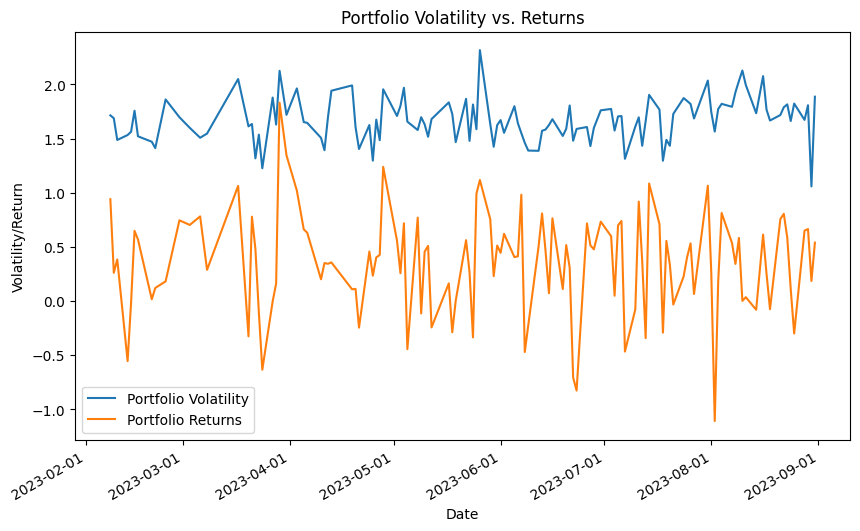

Correlation between Volatility and Returns: 0.3844040013782231


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure filtered_esv and filtered_hover are loaded as DataFrames
# Combine the datasets
combined_portfolio = pd.concat([filtered_esv, filtered_hover])

# Ensure the relevant column for percentage change is numeric
combined_portfolio['D_perc_chg'] = pd.to_numeric(combined_portfolio['D_perc_chg'], errors='coerce')

# Convert date column to datetime format
combined_portfolio['date'] = pd.to_datetime(combined_portfolio['date'])

# Calculate daily portfolio volatility (standard deviation of percentage changes)
daily_volatility = combined_portfolio.groupby('date')['D_perc_chg'].std()

# Calculate daily portfolio returns (mean of percentage changes)
daily_returns = combined_portfolio.groupby('date')['D_perc_chg'].mean()

# Plot daily volatility against portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(daily_volatility.index, daily_volatility.values, label='Portfolio Volatility')
plt.plot(daily_returns.index, daily_returns.values, label='Portfolio Returns')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Slant dates for better readability

plt.xlabel('Date')
plt.ylabel('Volatility/Return')
plt.title('Portfolio Volatility vs. Returns')
plt.legend()
plt.show()

# Statistical test to compare portfolio volatility and returns
portfolio_volatility = daily_volatility.values
portfolio_returns = daily_returns.values

# Perform t-test to compare means (Note: This might not be appropriate for volatility vs. returns)
# Instead, consider analyzing the relationship using correlation or regression
correlation = np.corrcoef(portfolio_volatility, portfolio_returns)[0, 1]
print(f"Correlation between Volatility and Returns: {correlation}")


<ipython-input-63-cab3281498ff>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_portfolio['daily_value'] = initial_value * (1 + combined_portfolio['D_perc_chg'].cumsum() / 100)


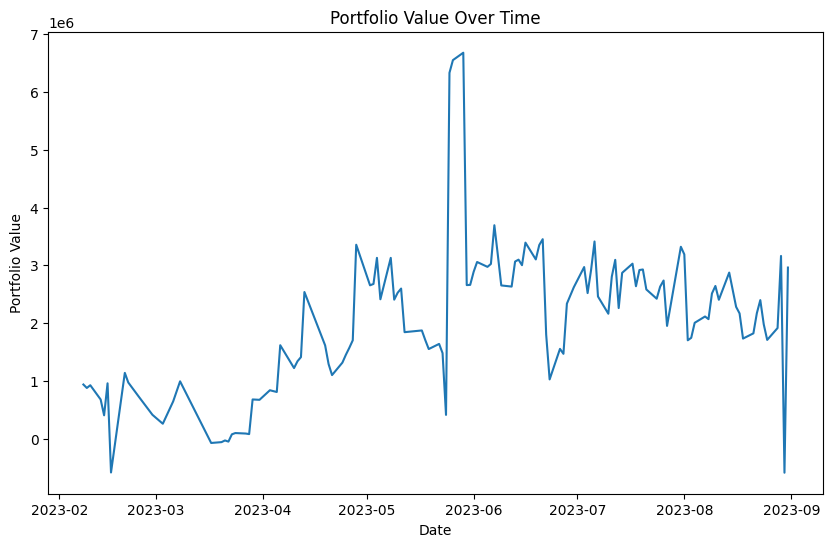

Final Portfolio Value: 2961764.1772151925


In [ ]:

# Ensure filtered_esv and filtered_hover are loaded as DataFrames
# Combine the datasets
combined_portfolio = pd.concat([filtered_esv, filtered_hover])

# Ensure the relevant column for percentage change is numeric
combined_portfolio['D_perc_chg'] = pd.to_numeric(combined_portfolio['D_perc_chg'], errors='coerce')

# Convert date column to datetime format
combined_portfolio['date'] = pd.to_datetime(combined_portfolio['date'])

# Calculate daily portfolio value assuming an initial portfolio value of 100,000
initial_value = 100000
combined_portfolio['daily_value'] = initial_value * (1 + combined_portfolio['D_perc_chg'].cumsum() / 100)

# Aggregate daily portfolio value
daily_portfolio_value = combined_portfolio.groupby('date')['daily_value'].mean()

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(daily_portfolio_value.index, daily_portfolio_value.values)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

# Calculate the final portfolio value as of the current date
final_portfolio_value = daily_portfolio_value.iloc[-1]

print(f"Final Portfolio Value: {final_portfolio_value}")


In [ ]:
import pandas as pd
import numpy as np

# Assuming filtered_esv and filtered_hover are loaded as DataFrames
# If not, load them before proceeding
# combined_portfolio = pd.concat([filtered_esv, filtered_hover])

# Ensure filtered_esv and filtered_hover are loaded
if 'filtered_esv' not in locals() or 'filtered_hover' not in locals():
    print("Please load filtered_esv and filtered_hover DataFrames.")
else:
    # Combine the datasets
    combined_portfolio = pd.concat([filtered_esv, filtered_hover])

    # Ensure the relevant column for percentage change is numeric
    combined_portfolio['D_perc_chg'] = pd.to_numeric(combined_portfolio['D_perc_chg'], errors='coerce')

    # Convert date column to datetime format
    combined_portfolio['date'] = pd.to_datetime(combined_portfolio['date'])

    # Filter data up to the current date
    current_date = pd.Timestamp('2025-03-08')
    filtered_portfolio = combined_portfolio[combined_portfolio['date'] <= current_date]

    # Calculate daily portfolio value assuming an initial portfolio value of 100,000
    initial_value = 100000
    filtered_portfolio['daily_value'] = initial_value * (1 + filtered_portfolio['D_perc_chg'].cumsum() / 100)

    # Aggregate daily portfolio value
    daily_portfolio_value = filtered_portfolio.groupby('date')['daily_value'].mean()

    # Get the final portfolio value as of the current date
    final_portfolio_value = daily_portfolio_value.iloc[-1]

    print(f"Current Portfolio Value: {final_portfolio_value}")


Current Portfolio Value: 2961764.1772151925
